In [124]:
import os
import sys

import torch
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

sys.path.append("../")
from src import Params, HybridPeftWrapper, EmbeddingIntegratedGradients, GenerationGradientAttributions

In [125]:
model_log_dir = "../model_logs"

In [126]:
def plot_scores(scores, input_tokens, output_tokens):
    fig, ax = plt.subplots()
    cax = ax.matshow(scores, cmap='RdYlGn')

    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(output_tokens)))
    ax.set_yticks(np.arange(len(input_tokens)))
    ax.set_xticklabels(output_tokens, rotation=90, ha='center')
    ax.set_yticklabels(input_tokens)

    plt.show()

# WikiSQL Attributions

In [127]:
wikisql_restore_version = "train_240317234431"

In [128]:
wikisql_config_path = os.path.join(model_log_dir, wikisql_restore_version, "hyper_params", "params.json")
wikisql_model_path = os.path.join(model_log_dir, wikisql_restore_version, "state", "model_best")

In [129]:
wikisql_config = Params(wikisql_config_path)

In [130]:
wikisql_base_model_name = wikisql_config.MODEL.BASE_MODEL_NAME

In [131]:
wikisql_base_model = AutoModelForSeq2SeqLM.from_pretrained(wikisql_base_model_name)
wikisql_embedding_layer = wikisql_base_model.encoder.embed_tokens
wikisql_tokenizer = AutoTokenizer.from_pretrained(wikisql_base_model_name)
wikisql_model = HybridPeftWrapper.from_pretrained(wikisql_base_model, wikisql_model_path)


In [132]:
wikisql_model = wikisql_model.to("cuda:0")
for param in wikisql_model.parameters():
    param.requires_grad = True

In [133]:
wikisql_int_grad = EmbeddingIntegratedGradients(wikisql_model, wikisql_embedding_layer)
wikisql_grad_attr = GenerationGradientAttributions(wikisql_int_grad, wikisql_tokenizer)

**Example 1**

/home/shahinshah/.pyenv/versions/3.10.13/envs/torch-env/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


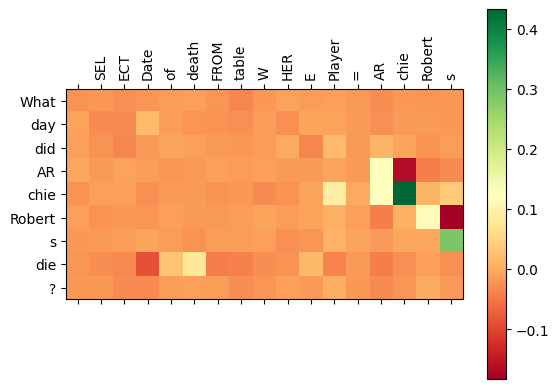

In [134]:
input_text = "What day did ARchie Roberts die?"
final_scores, cleaned_input, cleaned_output = wikisql_grad_attr.attribute(input_text)
plot_scores(final_scores, cleaned_input, cleaned_output)

**Example 2**

/home/shahinshah/.pyenv/versions/3.10.13/envs/torch-env/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


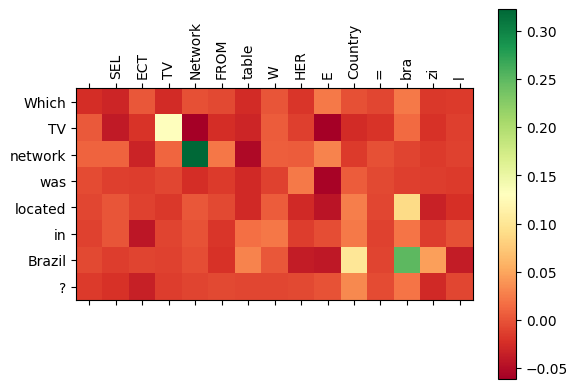

In [135]:
input_text = "Which TV network was located in Brazil?"
final_scores, cleaned_input, cleaned_output = wikisql_grad_attr.attribute(input_text)
plot_scores(final_scores, cleaned_input, cleaned_output)

In [136]:
del wikisql_model
del wikisql_base_model
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Samsum Attributions

In [137]:
samsum_restore_version = "train_240317171331"

In [138]:
samsum_config_path = os.path.join(model_log_dir, samsum_restore_version, "hyper_params", "params.json")
samsum_model_path = os.path.join(model_log_dir, samsum_restore_version, "state", "model_best")

In [139]:
samsum_config = Params(samsum_config_path)

In [140]:
samsum_base_model_name = samsum_config.MODEL.BASE_MODEL_NAME

In [141]:
samsum_base_model = AutoModelForSeq2SeqLM.from_pretrained(samsum_base_model_name)
samsum_embedding_layer = samsum_base_model.encoder.embed_tokens
samsum_tokenizer = AutoTokenizer.from_pretrained(samsum_base_model_name)
samsum_model = HybridPeftWrapper.from_pretrained(samsum_base_model, samsum_model_path)

In [142]:
samsum_model = samsum_model.to("cuda:0")
for param in samsum_model.parameters():
    param.requires_grad = True

In [143]:
samsum_int_grad = EmbeddingIntegratedGradients(samsum_model, samsum_embedding_layer)
samsum_grad_attr = GenerationGradientAttributions(samsum_int_grad, samsum_tokenizer)

**Example 1**

/home/shahinshah/.pyenv/versions/3.10.13/envs/torch-env/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


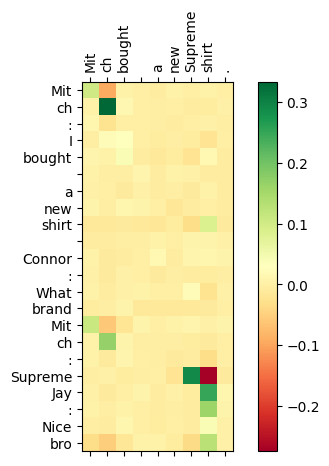

In [144]:
input_text = "Mitch: I bought a new shirt Connor: What brand Mitch: Supreme Jay: Nice bro"
final_scores, cleaned_input, cleaned_output = samsum_grad_attr.attribute(input_text)
plot_scores(final_scores, cleaned_input, cleaned_output)

**Example 2**

/home/shahinshah/.pyenv/versions/3.10.13/envs/torch-env/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


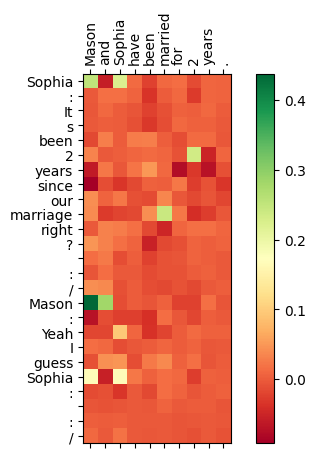

In [145]:
input_text = "Sophia: Its been 2 years since our marriage right? :/ Mason: Yeah I guess Sophia: :/"
final_scores, cleaned_input, cleaned_output = samsum_grad_attr.attribute(input_text)
plot_scores(final_scores, cleaned_input, cleaned_output)

In [146]:
del samsum_model
del samsum_base_model
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# SST-2 Attributions

In [147]:
sst2_restore_version = "train_240319200133"

In [148]:
sst2_config_path = os.path.join(model_log_dir, sst2_restore_version, "hyper_params", "params.json")
sst2_model_path = os.path.join(model_log_dir, sst2_restore_version, "state", "model_best")

In [149]:
sst2_config = Params(sst2_config_path)

In [150]:
sst2_base_model_name = sst2_config.MODEL.BASE_MODEL_NAME

In [151]:
sst2_base_model = AutoModelForSeq2SeqLM.from_pretrained(sst2_base_model_name)
sst2_embedding_layer = sst2_base_model.encoder.embed_tokens
sst2_tokenizer = AutoTokenizer.from_pretrained(sst2_base_model_name)
sst2_model = HybridPeftWrapper.from_pretrained(sst2_base_model, sst2_model_path)

In [152]:
sst2_model = sst2_model.to("cuda:0")
for param in sst2_model.parameters():
    param.requires_grad = True

In [153]:
sst2_int_grad = EmbeddingIntegratedGradients(sst2_model, sst2_embedding_layer)
sst2_grad_attr = GenerationGradientAttributions(sst2_int_grad, sst2_tokenizer)

**Example 1**

/home/shahinshah/.pyenv/versions/3.10.13/envs/torch-env/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


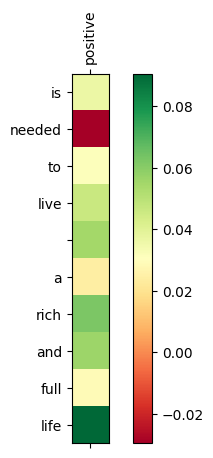

In [154]:
input_text = "is needed to live a rich and full life"
final_scores, cleaned_input, cleaned_output = sst2_grad_attr.attribute(input_text)
plot_scores(final_scores, cleaned_input, cleaned_output)

**Example 2**

/home/shahinshah/.pyenv/versions/3.10.13/envs/torch-env/lib/python3.10/site-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


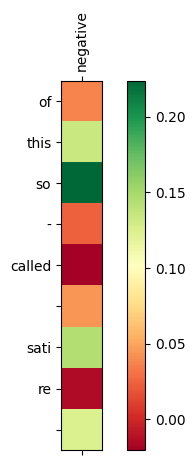

In [155]:
input_text = "of this so-called satire "
final_scores, cleaned_input, cleaned_output = sst2_grad_attr.attribute(input_text)
plot_scores(final_scores, cleaned_input, cleaned_output)

In [156]:
del sst2_model
del sst2_base_model
if torch.cuda.is_available():
    torch.cuda.empty_cache()